# Prototype WebServer

Jupyter Notebook to act as a Prototype WebServer, based on instructions from [FastAI Course Chaper 2](https://github.com/fastai/fastbook/blob/master/02_production.ipynb).

In [4]:
from fastai.vision.all import load_learner

/Users/teejays/Development/ai/lab-birdorforest/ml/venv-labbirdorforest-ml/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [7]:
learn_inf = load_learner('trained_model.pkl')

In [13]:
#hide_output
from ipywidgets import widgets
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value=(), description='Upload')

In [16]:
#hide
# For the book, we can't actually click an upload button, so we fake it
from types import SimpleNamespace
btn_upload = SimpleNamespace(data = ['../test-images/test_question1.jpg'])

In [18]:
from fastai.vision.all import PILImage
img = PILImage.create(btn_upload.data[-1])

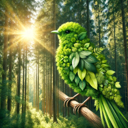

Output()

In [19]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

In [20]:
pred,pred_idx,probs = learn_inf.predict(img)

In [21]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: bird; Probability: 0.9790')

In [22]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [23]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [24]:

#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [26]:
#hide_output
from ipywidgets import VBox
VBox([widgets.Label('Select your image!'), 
      btn_upload, btn_run, out_pl, lbl_pred])